In [1]:
#Note make sure to download the file below, as well as the files from previous years from: 
# https://github.com/RiceD2KLab/HERC_Sp25/tree/main/0_Datasets/1.6Data(year) /District/clean_data
# note that (year) is for the year that one chooses 
import pandas as pd
file_path = r"https://raw.githubusercontent.com/RiceD2KLab/HERC_Sp25/refs/heads/main/0_Datasets/1.6Data2023/District/clean_data/distperf2_2023_clean.csv"
df1 = pd.read_csv(file_path) #using 2023 as an example


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Automatically select all rate columns (everything except "DISTNAME")
rate_columns = [col for col in df1.columns if col != "DISTNAME"]

# Reshape Data for Plotting
df1_melted = df1.melt(id_vars=["DISTNAME"], value_vars=rate_columns,
                       var_name="Category", value_name="Rate")

# Function to create checkboxes dynamically
def create_checkboxes(options):
    return {opt: widgets.Checkbox(value=False, description=opt) for opt in options}

# Create checkboxes for districts and rate categories
district_checkboxes = create_checkboxes(df1_melted["DISTNAME"].unique())
rate_checkboxes = create_checkboxes(df1_melted["Category"].unique())

# Function to get selected values
def get_selected(options):
    return [key for key, widget in options.items() if widget.value]

# Function to update plot
def update_plot(_):
    selected_districts = get_selected(district_checkboxes)
    selected_rates = get_selected(rate_checkboxes)

    # Filter Data
    filtered_df = df1_melted[(df1_melted["DISTNAME"].isin(selected_districts)) &
                             (df1_melted["Category"].isin(selected_rates))]

    # Check if data exists
    if filtered_df.empty:
        print("❌ No data found for the selected districts and rates.")
        return

    # Create Bar Plot
    plt.figure(figsize=(12, 6))
    sns.barplot(data=filtered_df, x="DISTNAME", y="Rate", hue="Category")

    plt.xticks(rotation=45)
    plt.xlabel("District Name")
    plt.ylabel("Completion Rate")
    plt.title("AP/IB Course Completion Rates by District")
    plt.legend(title="Rate Category")
    plt.show()

# Button to Apply Selection
apply_button = widgets.Button(description="Apply Selection")
apply_button.on_click(update_plot)

# Create collapsible checkboxes inside an Accordion
accordion = widgets.Accordion(children=[
    widgets.VBox(list(district_checkboxes.values())),
    widgets.VBox(list(rate_checkboxes.values()))
])

# Set Accordion Titles
accordion.set_title(0, "Select Districts")
accordion.set_title(1, "Select Rate Categories")

# Display Collapsible Checkboxes and Button
display(accordion, apply_button)


Accordion(children=(VBox(children=(Checkbox(value=False, description='CAYUGA ISD'), Checkbox(value=False, desc…

Button(description='Apply Selection', style=ButtonStyle())

Accordion(children=(VBox(children=(Checkbox(value=False, description='ANDERSON'), Checkbox(value=False, descri…

Button(description='Apply Selection', style=ButtonStyle())

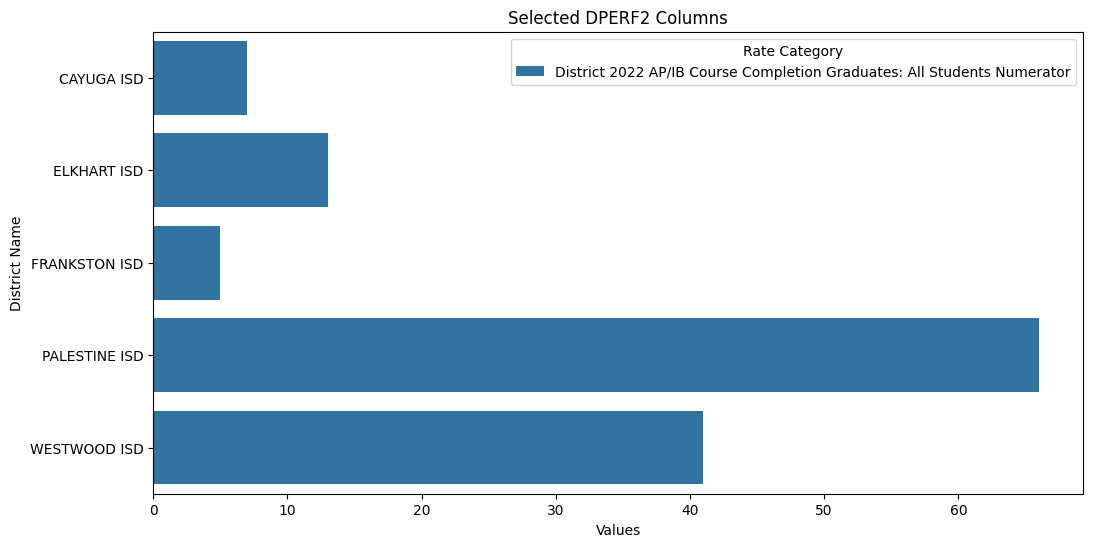

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Automatically select all rate columns (everything except "DISTNAME" and "CNTYNAME")
rate_columns = [col for col in df1.columns if col not in ["DISTNAME", "CNTYNAME"]]

# Reshape Data for Plotting
df1_melted = df1.melt(id_vars=["CNTYNAME", "DISTNAME"], value_vars=rate_columns,
                       var_name="Category", value_name="Rate")

# Function to create checkboxes dynamically
def create_checkboxes(options):
    return {opt: widgets.Checkbox(value=False, description=opt) for opt in options}

# Create checkboxes for counties, districts, and rate categories
county_checkboxes = create_checkboxes(df1_melted["CNTYNAME"].unique())
district_checkboxes = create_checkboxes(df1_melted["DISTNAME"].unique())
rate_checkboxes = create_checkboxes(df1_melted["Category"].unique())

# Function to get selected values
def get_selected(options):
    return [key for key, widget in options.items() if widget.value]

# Function to auto-select all districts in a selected county
def update_district_selection(_):
    selected_counties = get_selected(county_checkboxes)

    # Find districts that belong to selected counties
    districts_to_select = df1_melted[df1_melted["CNTYNAME"].isin(selected_counties)]["DISTNAME"].unique()

    # Check all matching districts
    for district, checkbox in district_checkboxes.items():
        checkbox.value = district in districts_to_select

# Attach the function to county checkboxes
for checkbox in county_checkboxes.values():
    checkbox.observe(update_district_selection, names='value')

# Function to update plot
# Function to update plot
# Function to update plot
def update_plot(_):
    selected_districts = get_selected(district_checkboxes)
    selected_rates = get_selected(rate_checkboxes)

    # Filter Data
    filtered_df = df1_melted[(df1_melted["DISTNAME"].isin(selected_districts)) &
                             (df1_melted["Category"].isin(selected_rates))]

    # Remove districts that have all missing or zero values for the selected rates
    filtered_df = filtered_df.groupby("DISTNAME").filter(lambda x: x["Rate"].notna().any() and x["Rate"].sum() > 0)

    # Check if data exists after filtering
    if filtered_df.empty:
        print("❌ No data found for the selected districts and rates.")
        return

    # Create Horizontal Bar Plot
    plt.figure(figsize=(12, 6))
    sns.barplot(data=filtered_df, x="Rate", y="DISTNAME", hue="Category", orient="h")

    plt.ylabel("District Name")
    plt.xlabel("Values")
    plt.title("Selected DPERF2 Columns")
    plt.legend(title="Rate Category")
    plt.show()



# Button to Apply Selection
apply_button = widgets.Button(description="Apply Selection")
apply_button.on_click(update_plot)

# Create collapsible checkboxes inside an Accordion
accordion = widgets.Accordion(children=[
    widgets.VBox(list(county_checkboxes.values())),  # County selection
    widgets.VBox(list(district_checkboxes.values())),  # District selection
    widgets.VBox(list(rate_checkboxes.values()))  # Rate selection
])

# Set Accordion Titles
accordion.set_title(0, "Select Counties (CNTYNAME)")
accordion.set_title(1, "Select Districts (DISTNAME)")
accordion.set_title(2, "Select Rate Categories")

# Display Collapsible Checkboxes and Button
display(accordion, apply_button)


In [ ]:
import pandas as pd
import geopandas as gpd
import folium
import ipywidgets as widgets
from IPython.display import display

# Load Texas county shapefile from Census
counties_files = r"C:\Users\mmath\OneDrive\Desktop\Capstone\HERC_Sp25\0_Datasets\2.1Geometry\cb_2018_us_county_20m.zip"
texas_counties = gpd.read_file(counties_files)
texas_counties = texas_counties[texas_counties['STATEFP'] == '48']  # Filter only Texas (FIPS 48)
texas_counties = texas_counties[['NAME', 'geometry']]  # Keep necessary columns
texas_counties.columns = ['CNTYNAME', 'geometry']  # Rename column to match
texas_counties['CNTYNAME'] = texas_counties['CNTYNAME'].str.upper()  # Ensure uppercase

# Ensure column names are clean and in uppercase
df1.columns = df1.columns.str.strip().str.upper()

# Select only numeric columns but **explicitly keep CNTYNAME**
numeric_columns = df1.select_dtypes(include=["number"]).columns.tolist()
rate_columns = ["CNTYNAME"] + numeric_columns  # Add CNTYNAME back

# Compute county-level averages (NaNs ignored by default)
df_county_avg = df1.groupby("CNTYNAME")[numeric_columns].mean().reset_index()

# Merge county data with map data
merged = texas_counties.merge(df_county_avg, on="CNTYNAME", how="left")

# Create dropdown for selecting a column
rate_dropdown = widgets.Dropdown(
    options=numeric_columns,
    description="Select Rate:",
    value=numeric_columns[0],  # Default selection
)

# Function to update the map
def update_map(selected_rate):
    m = folium.Map(location=[31.0, -99.0], zoom_start=6)

    # Add choropleth layer
    folium.Choropleth(
        geo_data=merged,
        name="choropleth",
        data=merged,
        columns=["CNTYNAME", selected_rate],
        key_on="feature.properties.CNTYNAME",
        fill_color="YlGnBu",
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=f"{selected_rate} AVG by County"
    ).add_to(m)

    # Display the map
    display(m)

# Button to Apply Selection
apply_button = widgets.Button(description="Apply Selection")
apply_button.on_click(lambda _: update_map(rate_dropdown.value))

# Display dropdown and button
display(rate_dropdown, apply_button)
